In [11]:
import pandas as pd
import sklearn

print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)


Pandas version: 2.2.3
Scikit-learn version: 1.5.2


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


In [16]:
# Load the dataset (Ensure student_data.csv is in the same directory)
data = pd.read_csv("student_data.csv")

# Display the first 5 rows of the dataset
print("First 5 rows of data:")
print(data.head())

# Get dataset information
print("\nDataset Info:")
print(data.info())

# Check if there are any missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())


First 5 rows of data:
   Hours_Studied  Review_Session  Results
0       3.745401               0        0
1       9.507143               1        1
2       7.319939               0        1
3       5.986585               0        1
4       1.560186               1        1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.4 KB
None

Missing Values in Dataset:
Hours_Studied     0
Review_Session    0
Results           0
dtype: int64


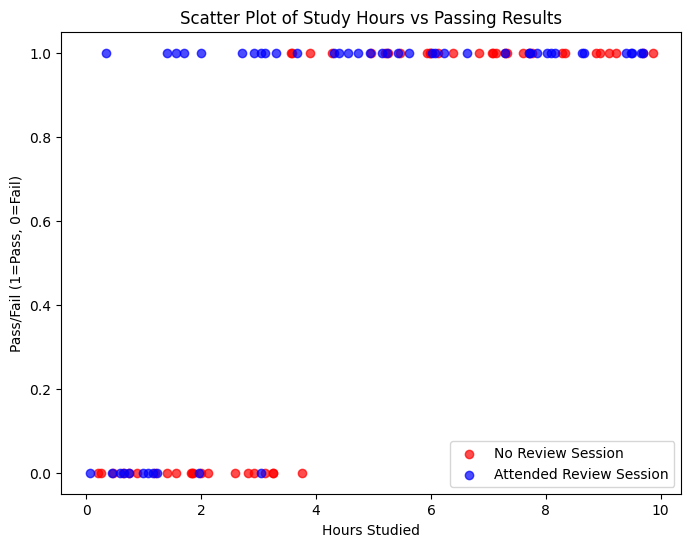

In [17]:
# Scatter Plot using Matplotlib (Without Seaborn)
plt.figure(figsize=(8,6))

# Plot students who did NOT attend the review session (Review_Session = 0)
plt.scatter(data[data["Review_Session"] == 0]["Hours_Studied"],
            data[data["Review_Session"] == 0]["Results"],
            label="No Review Session", alpha=0.7, color='red')

# Plot students who attended the review session (Review_Session = 1)
plt.scatter(data[data["Review_Session"] == 1]["Hours_Studied"],
            data[data["Review_Session"] == 1]["Results"],
            label="Attended Review Session", alpha=0.7, color='blue')

plt.xlabel("Hours Studied")
plt.ylabel("Pass/Fail (1=Pass, 0=Fail)")
plt.title("Scatter Plot of Study Hours vs Passing Results")
plt.legend()
plt.show()


In [18]:
# Define the independent variables (X) and dependent variable (y)
X = data[['Hours_Studied', 'Review_Session']]  # Features
y = data['Results']  # Target (Pass/Fail)


In [19]:
# Initialize the logistic regression model
log_reg_model = LogisticRegression()

# Train (fit) the model using the dataset
log_reg_model.fit(X, y)

# Print learned coefficients
print("Intercept (β0):", log_reg_model.intercept_[0])
print("Coefficient for Hours_Studied (β1):", log_reg_model.coef_[0][0])
print("Coefficient for Review_Session (β2):", log_reg_model.coef_[0][1])


Intercept (β0): -4.6137389159566276
Coefficient for Hours_Studied (β1): 1.3654201630319376
Coefficient for Review_Session (β2): 1.8779759145535335


In [20]:
# Predict pass/fail outcomes
y_pred = log_reg_model.predict(X)

# Get probability scores for ROC curve
y_prob = log_reg_model.predict_proba(X)[:, 1]


In [21]:
accuracy = accuracy_score(y, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.93


In [22]:
auc = roc_auc_score(y, y_prob)
print("Model AUC Score:", auc)


Model AUC Score: 0.9761029411764706


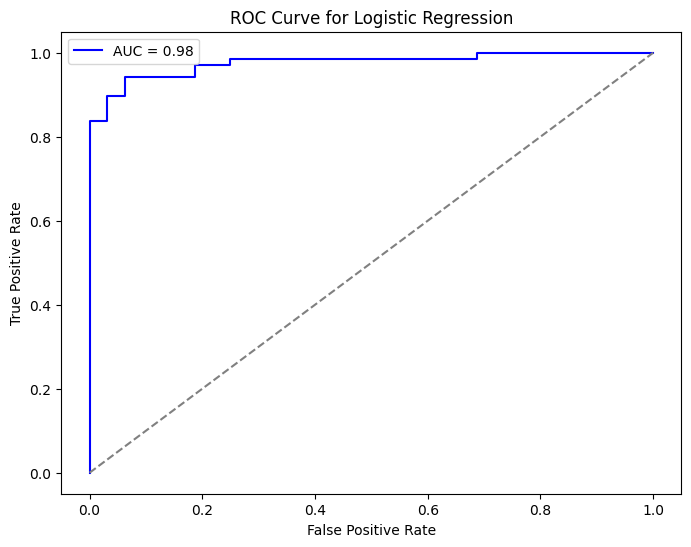

In [23]:
# Compute False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(y, y_prob)

# Plot ROC Curve using Matplotlib
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")  # Baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()


In [24]:
print("\nFinal Model Insights:")
print(f"Intercept (β0): {log_reg_model.intercept_[0]:.2f}")
print(f"Coefficient for Hours_Studied (β1): {log_reg_model.coef_[0][0]:.2f}")
print(f"Coefficient for Review_Session (β2): {log_reg_model.coef_[0][1]:.2f}")
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model AUC Score: {auc:.2f}")



Final Model Insights:
Intercept (β0): -4.61
Coefficient for Hours_Studied (β1): 1.37
Coefficient for Review_Session (β2): 1.88
Model Accuracy: 0.93
Model AUC Score: 0.98
